In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Desktop/Continuous MPS/MatrixProductBP.jl`


In [18]:
using Nemo
using Plots

function complex(x::Nemo.AcbFieldElem)
    return ComplexF64(Float64(real(x)), Float64(imag(x)))
end
function hg2f1(a, b, c, z)
    CC = AcbField(1024)
    a_ = CC(a)
    b_ = CC(b)
    c_ = CC(c)
    x_ = CC(z)
    hypgeom = hypergeometric_2f1(a_, b_, c_, x_)
    return complex(hypgeom)
end

hg2f1 (generic function with 1 method)

In [3]:
K = 100
smax = 5
β = 1
;

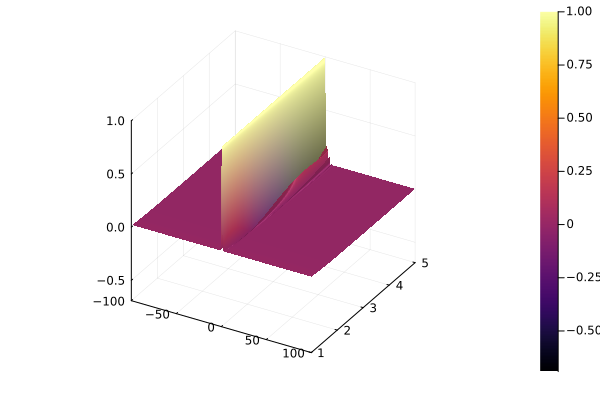

In [4]:
# ℜ(b) = 0
# X = +1

bre = 0.0
γ = -K:K
s = 1:0.1:smax
k(γ) = π .* γ
b(γ,s) = bre + k(γ) / (2*β * s) * im
z(s) = -exp(2β*(1.0+s))
f(γ,s) = real(hg2f1(1.0,b(γ,s),1+b(γ,s),z(s)))

plot(γ,s,f, st=:surface)

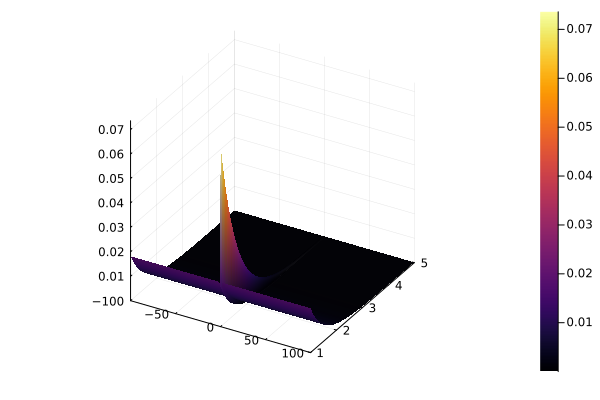

In [5]:
# ℜ(b) = 1
# X = +1

bre = 1.0
γ = -K:K
s = 1:0.1:smax
k(γ) = π .* γ
b(γ,s) = bre + k(γ) / (2*β * s) * im
z(s) = -exp(2β*(1.0+s))
f(γ,s) = real(hg2f1(1.0,b(γ,s),1+b(γ,s),z(s)))

plot(γ,s,f, st=:surface)

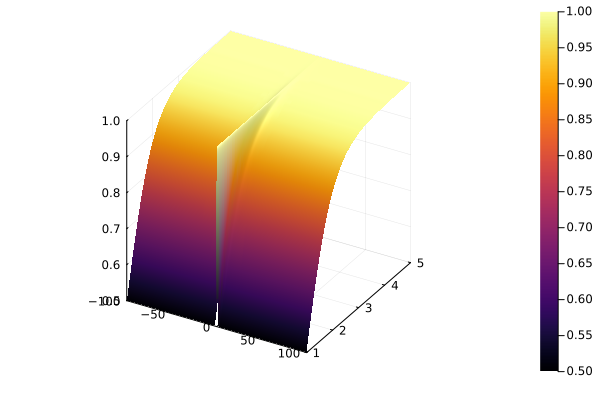

In [6]:
# ℜ(b) = 0
# X = -1

bre = 0.0
γ = -K:K
s = 1:0.1:smax
k(γ) = π .* γ
b(γ,s) = bre + k(γ) / (2*β * s) * im
z(s) = -exp(2β*(1.0-s))
f(γ,s) = real(hg2f1(1.0,b(γ,s),1+b(γ,s),z(s)))

plot(γ,s,f, st=:surface)

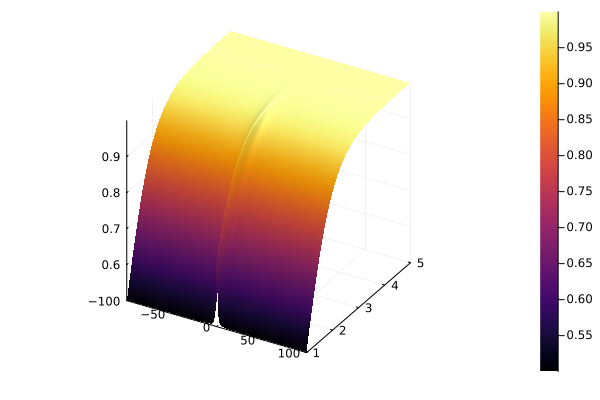

In [7]:
# ℜ(b) = 1
# X = -1

bre = 1.0
γ = -K:K
s = 1:0.1:smax
k(γ) = π .* γ
b(γ,s) = bre + k(γ) / (2*β * s) * im
z(s) = -exp(2β*(1.0-s))
f(γ,s) = real(hg2f1(1.0,b(γ,s),1+b(γ,s),z(s)))

plot(γ,s,f, st=:surface)

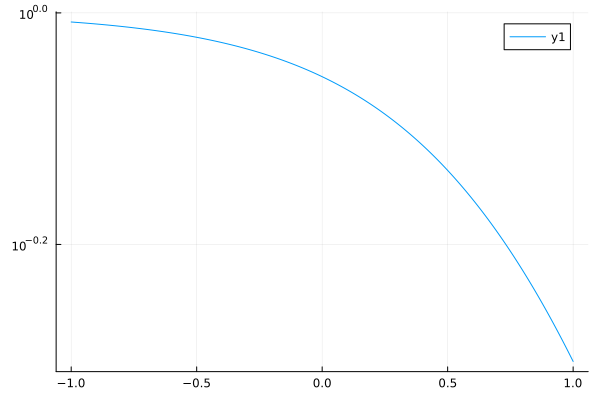

In [8]:
xp1 = 0.0
γ = 100
kᵧ = π*γ
β = 1.0
scale = 2.0
Jⱼᵢ = 1
xⱼᵗ = 1
X = -1

bb = (xp1 + im*kᵧ/(β*scale)) / 2
cc = 1 + bb
Jxj(h) = Jⱼᵢ*xⱼᵗ + h

f(h) = abs(hg2f1(1.0, bb, cc, -exp(2β*(Jxj(h)+scale*X))))

hplot = -1:0.0001:1
plot(hplot,f.(hplot),yaxis=:log)

In [9]:
# using HypergeometricFunctions
# hg2f1(a,b,c,z) = pFq((a,b),(c,),z)

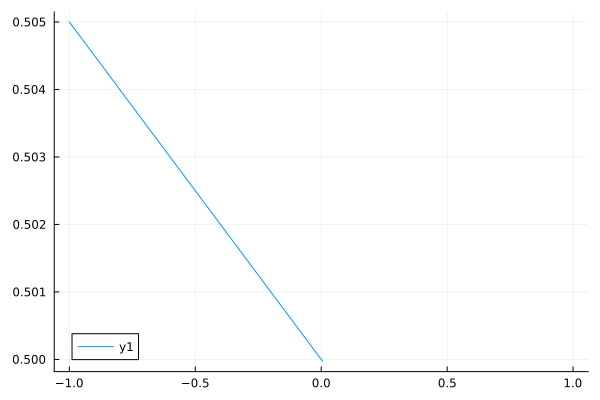

In [19]:
xp1 = 0.0
γ = 100
kᵧ = π*γ
β = 0.01
scale = 2.0
Jⱼᵢ = 1
xⱼᵗ = 1
X = -1

bb = (xp1 + im*kᵧ/(β*scale)) / 2
cc = 1 + bb
Jxj(h) = Jⱼᵢ*xⱼᵗ + h

f(h) = abs(hg2f1(1.0, bb, cc, -exp(2β*h)))

hplot = -1:0.001:1
plot(hplot,f.(hplot))

In [15]:
bb

0.0 + 112.1997376282069im

In [13]:
f(0.5)

NaN